<h2><font color="#004D7F" size=6>Módulo 2. Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>3. Visualización de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Cargar el conjunto de datos](#section11)
* [2. Visualización Univariable](#section2)
    * [2.1. Histogramas](#section21)
    * [2.2. Densidad](#section22)
    * [2.3. Boxplots](#section23)
* [3. Visualización Multivariable](#section3)
    * [3.1. Matriz de correlación](#section31)
    * [3.2. Matriz de dispersión](#section32)
    * [3.3. Matriz de dispersión por clase](#section33)
    * [3.4. Boxplot por clase](#section34)

In [ ]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Lo primero que debemos realizar a la hora de trabajar con machine learning es visualizar nuestros datos para conocer su comportamiento y distribución. Esta primera observación de datos posibilita aprender más sobre ellos siendo la forma más rápida y útil de conocer qué técnicas son las más adecuadas en _pre_ y _pos_ procesamiento. En este sentido en esta tercera sección trabajaremos:
* Cómo crear gráficos para entender cada atributo de manera independiente.
* Cómo crear gráficos para entender las relaciones entre los diferentes atributos.

Los gráficos de las relaciones entre los atributos pueden darnos una idea de los atributos que pueden ser redundantes, los métodos de remuestreo que pueden ser necesarios y, en última instancia, la dificultad de un problema de predicción. Para ello, la fase de visualización puede dividirse en las siguientes partes:
* **Visualización univariable**: Cuando queremos visualizar un atributo de manera independiente a los demás.
* **Visualización multivariable**: Cuando queremos visualizar la interacción entre los diferentes atributos de nuestro conjunto de datos.

<a id="section11"></a>
## <font color="#004D7F">1.1. Cargar el conjunto de datos</font>

Para esta práctica vamos a cargar el conjunto de datos de Pima Indian Diabetes para hacer observaciones con las funciones de estadística descriptiva.

In [4]:
# Load CSV using Pandas
import pandas as pd
filename = './pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class' ]
data = pd.read_csv(filename, names=names)
print (data)

     preg  plas  pres  skin  test  mass     pedi  age  class
0       6   148    72    35     0  33.6   627.00   50      1
1       1    85    66    29     0  26.6   351.00   31      0
2       8   183    64     0     0  23.3   672.00   32      1
3       1    89    66    23    94  28.1   167.00   21      0
4       0   137    40    35   168  43.1  2288.00   33      1
..    ...   ...   ...   ...   ...   ...      ...  ...    ...
763    10   101    76    48   180  32.9   171.00   63      0
764     2   122    70    27     0  36.8     0.34   27      0
765     5   121    72    23   112  26.2   245.00   30      0
766     1   126    60     0     0  30.1   349.00   47      1
767     1    93    70    31     0  30.4   315.00   23      0

[768 rows x 9 columns]


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Visualización Univariable</font>

Como se ha comentado anteriormente, las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section21"></a>
## <font color="#004D7F">2.1. Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) es una pontente librería de visualización de datos

<ipython-input-2-b662f7a0b794>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


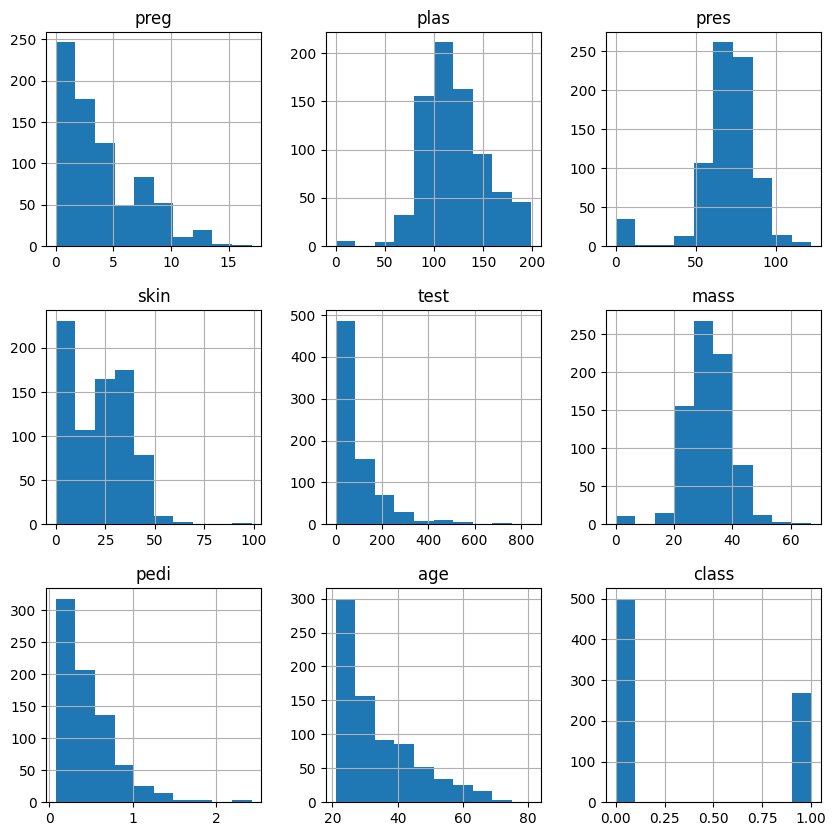

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as ptl
fig = ptl.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax)
ptl.show()

Podemos ver que quizás los atributos `age`, `pedi` y `test` pueden tener una distribución exponencial. También podemos ver que quizás los atributos `mass`, `pres` y `plas` pueden tener una distribución gaussiana o casi gaussiana. Esto es interesante porque muchas técnicas de aprendizaje automático suponen una distribución univariada gaussiana en las variables de entrada.

Esta misma representación puede verse con el paquete [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html). Seaborn es un paquete de visualización más profesional que Matplotlib, además de usar este por debajo. Podemos ver los Histogramas con una línea de densidad que nos muestra su distribución

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En la nueva versión de seaborn ha quedado "deprecated" la función `distplot`. Para esta visualización se utilizará `histplot` tal y como lo pone ya en el caja de código.
</div>

<Axes: xlabel='class', ylabel='Density'>

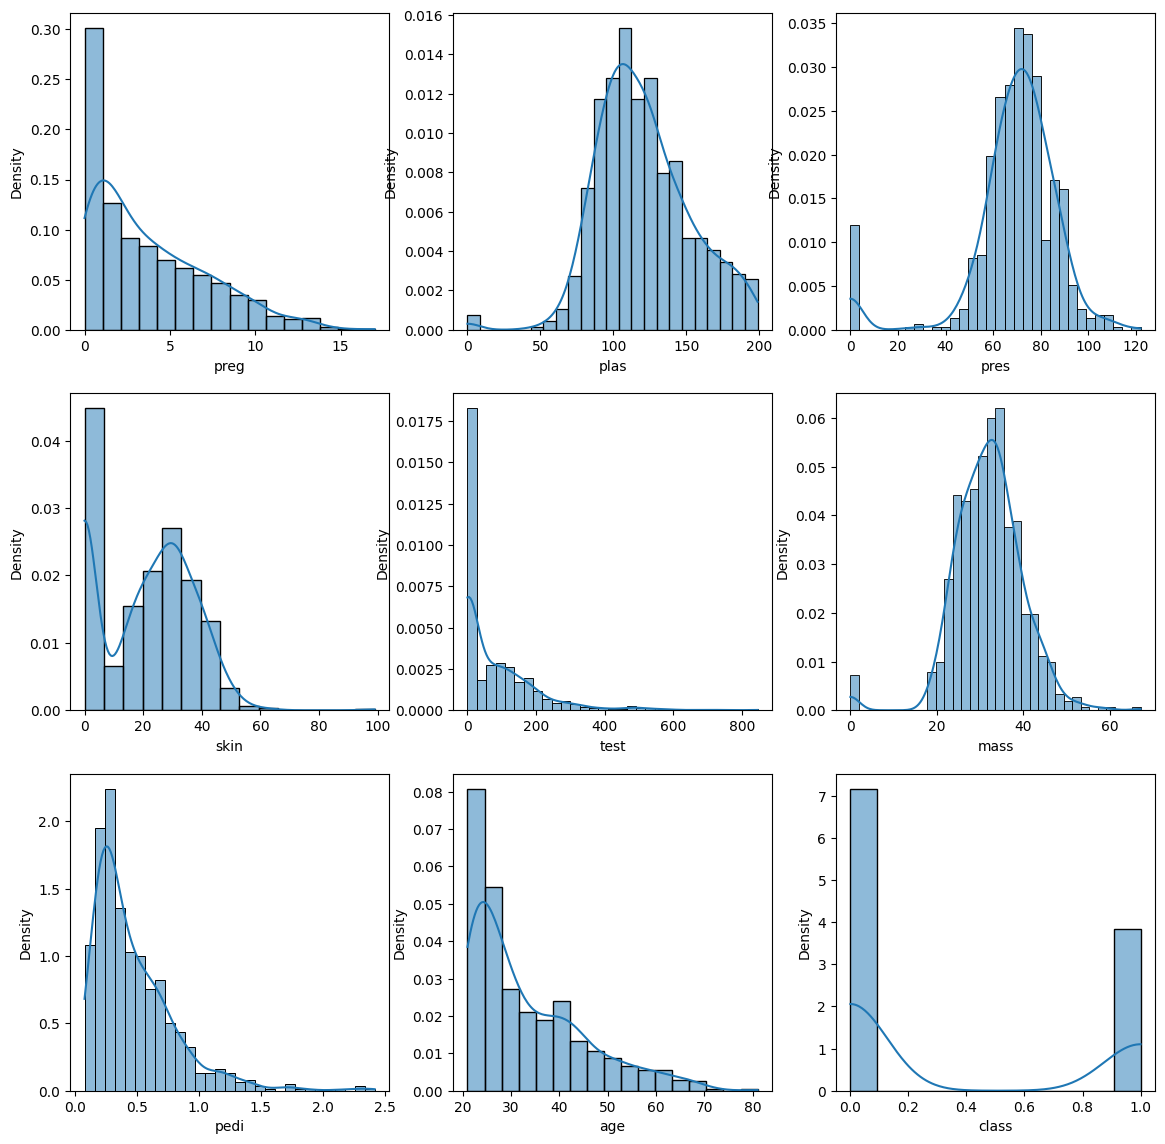

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, ax =plt.subplots(3,3,figsize=(14,14))
sns.histplot(data["preg"], ax=ax[0, 0], kde=True, stat="density")
sns.histplot(data["plas"], ax=ax[0, 1], kde=True, stat="density")
sns.histplot(data["pres"], ax=ax[0, 2], kde=True, stat="density")
sns.histplot(data["skin"], ax=ax[1, 0], kde=True, stat="density")
sns.histplot(data["test"], ax=ax[1, 1], kde=True, stat="density")
sns.histplot(data["mass"], ax=ax[1, 2], kde=True, stat="density")
sns.histplot(data["pedi"], ax=ax[2, 0], kde=True, stat="density")
sns.histplot(data["age"], ax=ax[2, 1], kde=True, stat="density")
sns.histplot(data["class"], ax=ax[2, 2], kde=True, stat="density")

<a id="section22"></a>
## <font color="#004D7F">2.2. Densidad </font>

Las gráficas se ven como un histograma abstracto con una curva suave dibujada a través de la parte superior de cada contenedor, al igual que su ojo intentó hacer con los histogramas. Podemos ver que la distribución de cada atributo es más clara que los histogramas

<ipython-input-5-674eff1853d6>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax, kind='density', subplots=True, layout=(3,3), sharex = False)


<function matplotlib.pyplot.show(close=None, block=None)>

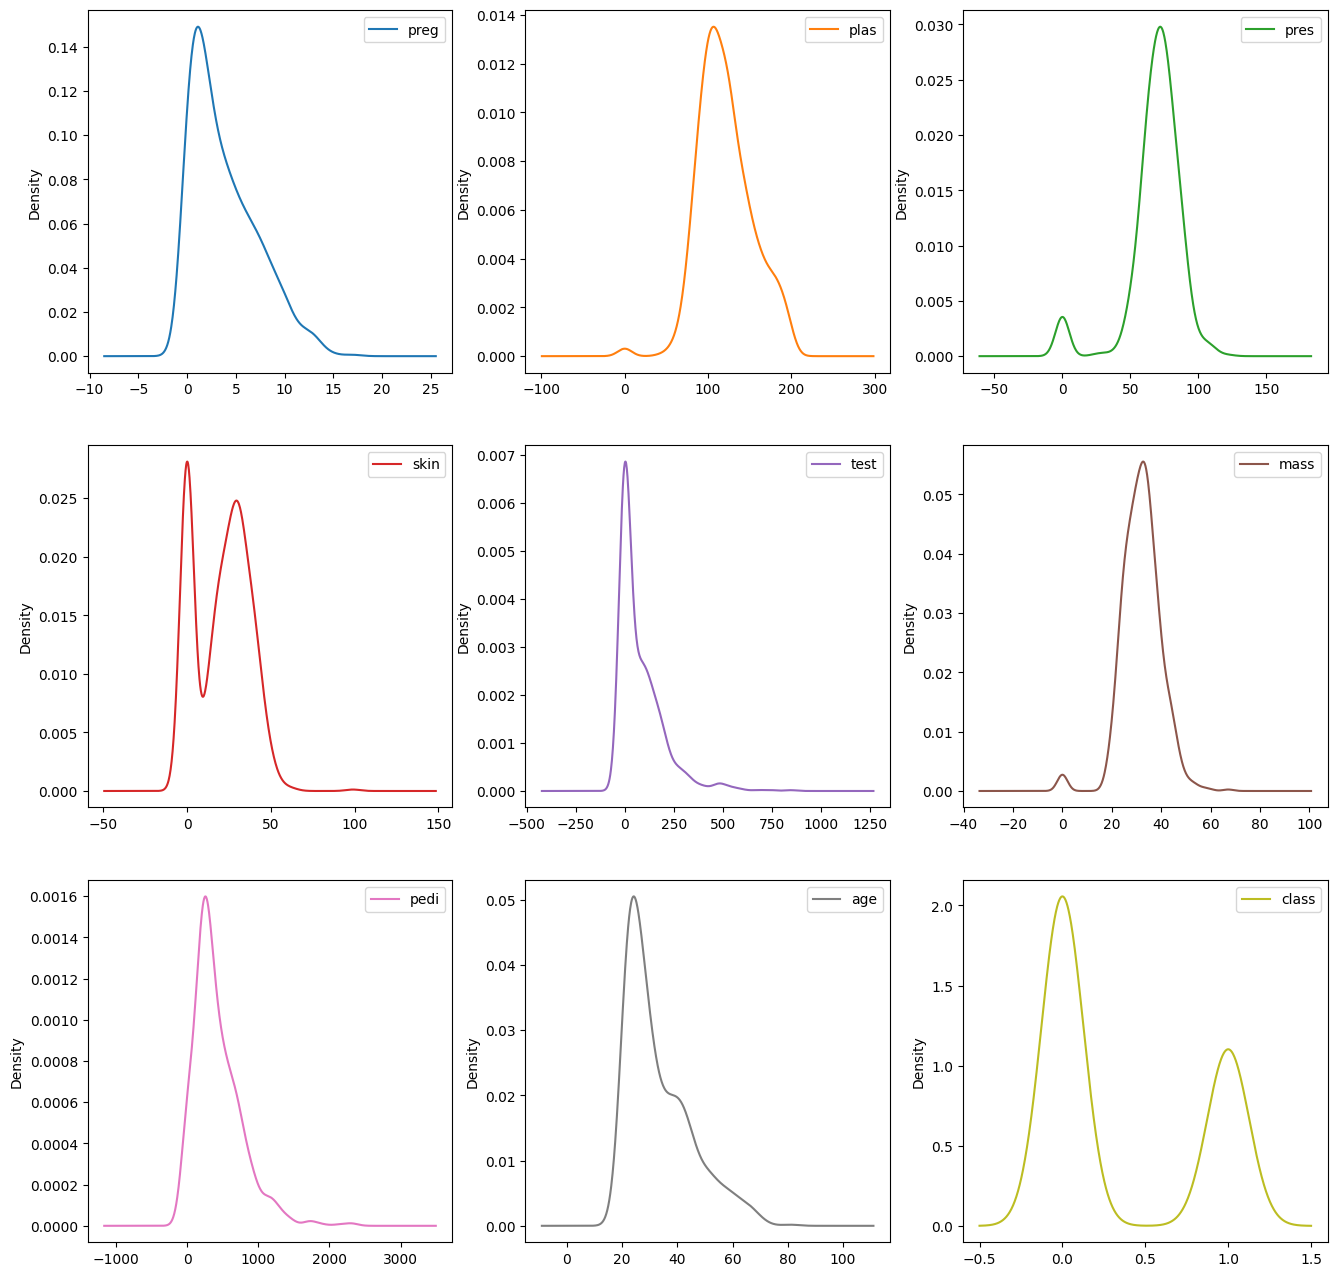

In [5]:
%matplotlib inline
#Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize =(16,16))
ax = fig.gca()
data.plot(ax=ax, kind='density', subplots=True, layout=(3,3), sharex = False)
plt.show


Al igual que hemos visto antes podemos ver también el gráfico con la libreria Seaborn

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En la nueva versión de seaborn ha quedado "deprecated" la función `distplot`. Para esta visualización se utilizará `kdeplot` tal y como lo pone ya en el caja de código.
</div>

<Axes: xlabel='class', ylabel='Density'>

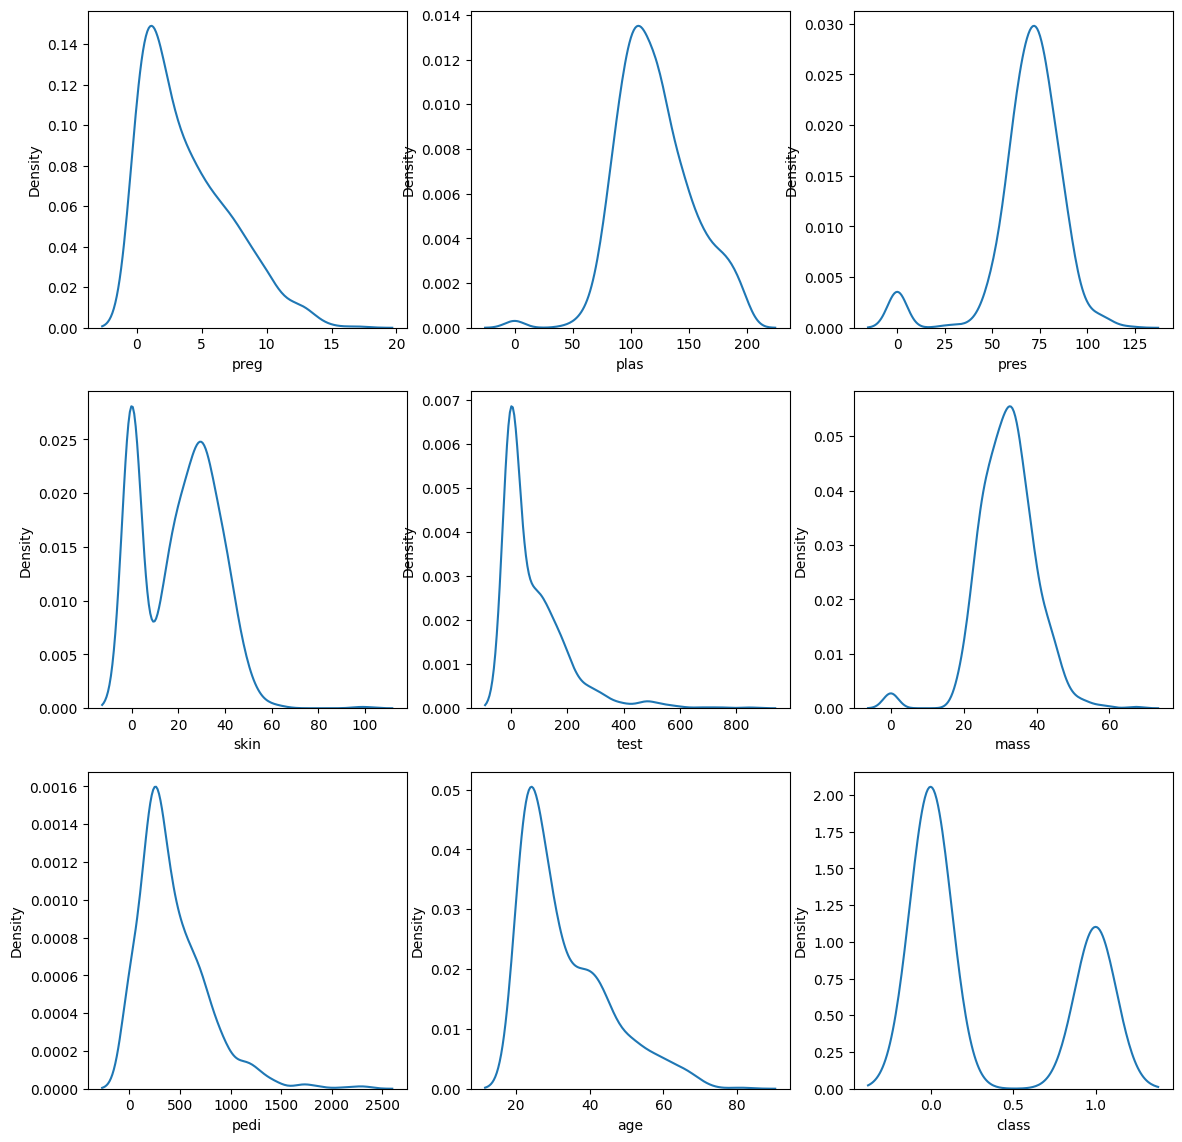

In [6]:
%matplotlib inline
# Univariate Histograms
f, axes = plt.subplots(3, 3, figsize = (14,14))
sns.kdeplot(data["preg"], ax = axes[0,0])
sns.kdeplot(data["plas"], ax = axes[0,1])
sns.kdeplot(data["pres"], ax = axes[0,2])
sns.kdeplot(data["skin"], ax = axes[1,0])
sns.kdeplot(data["test"], ax = axes[1,1])
sns.kdeplot(data["mass"], ax = axes[1,2])
sns.kdeplot(data["pedi"], ax = axes[2,0])
sns.kdeplot(data["age"], ax = axes[2,1])
sns.kdeplot(data["class"], ax = axes[2,2])

<a id="section23"></a>
## <font color="#004D7F">2.3. Boxplots </font>

Podemos ver que la extensión de los atributos es bastante diferente. Algunos como la `age`, `test` y `skin` parecen bastante sesgados hacia valores más pequeños.

<ipython-input-8-511669e822b0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax, kind='box', subplots=True, layout=(3,3), sharex = False)


<function matplotlib.pyplot.show(close=None, block=None)>

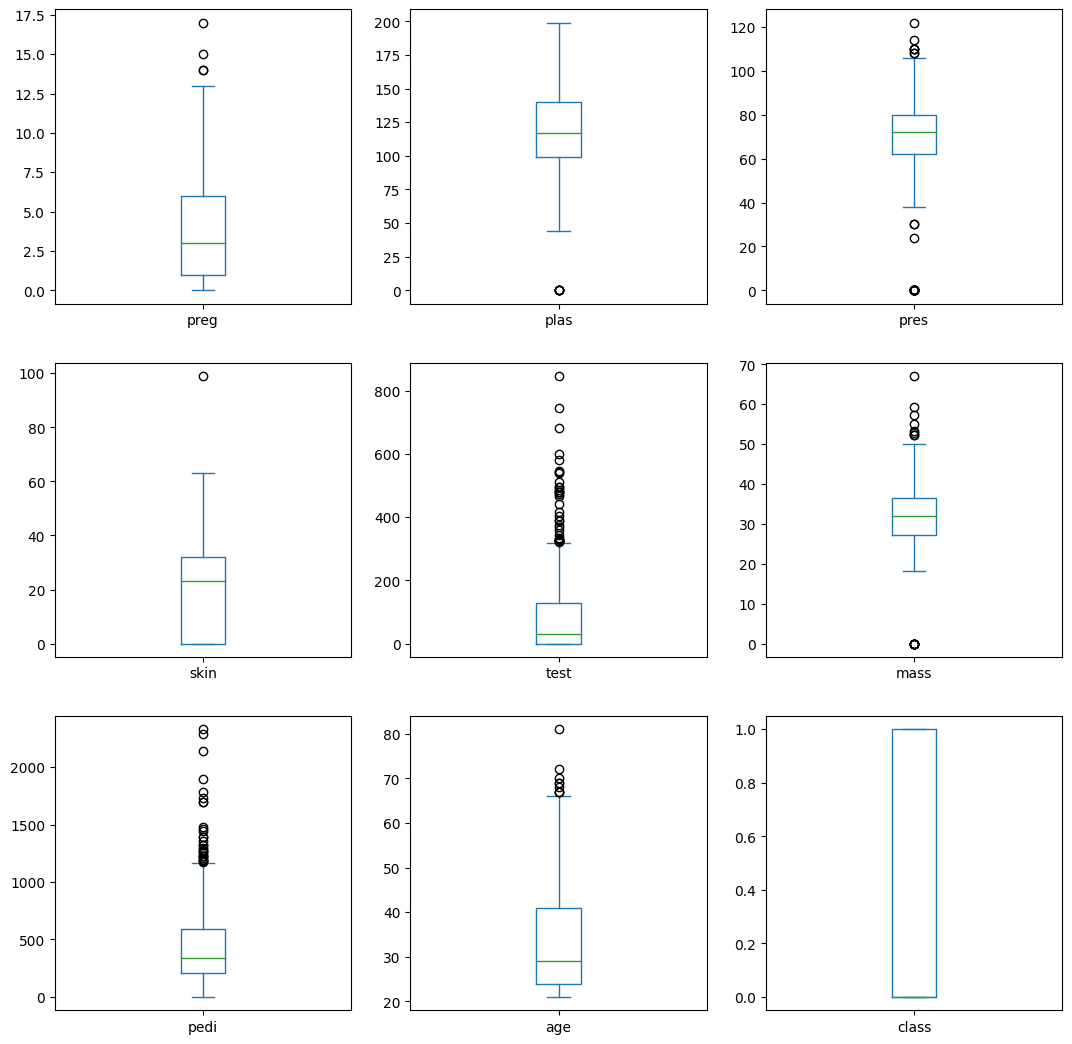

In [8]:
fig = plt.figure(figsize =(13,13))
ax = fig.gca()
data.plot(ax=ax, kind='box', subplots=True, layout=(3,3), sharex = False)
plt.show

<Axes: >

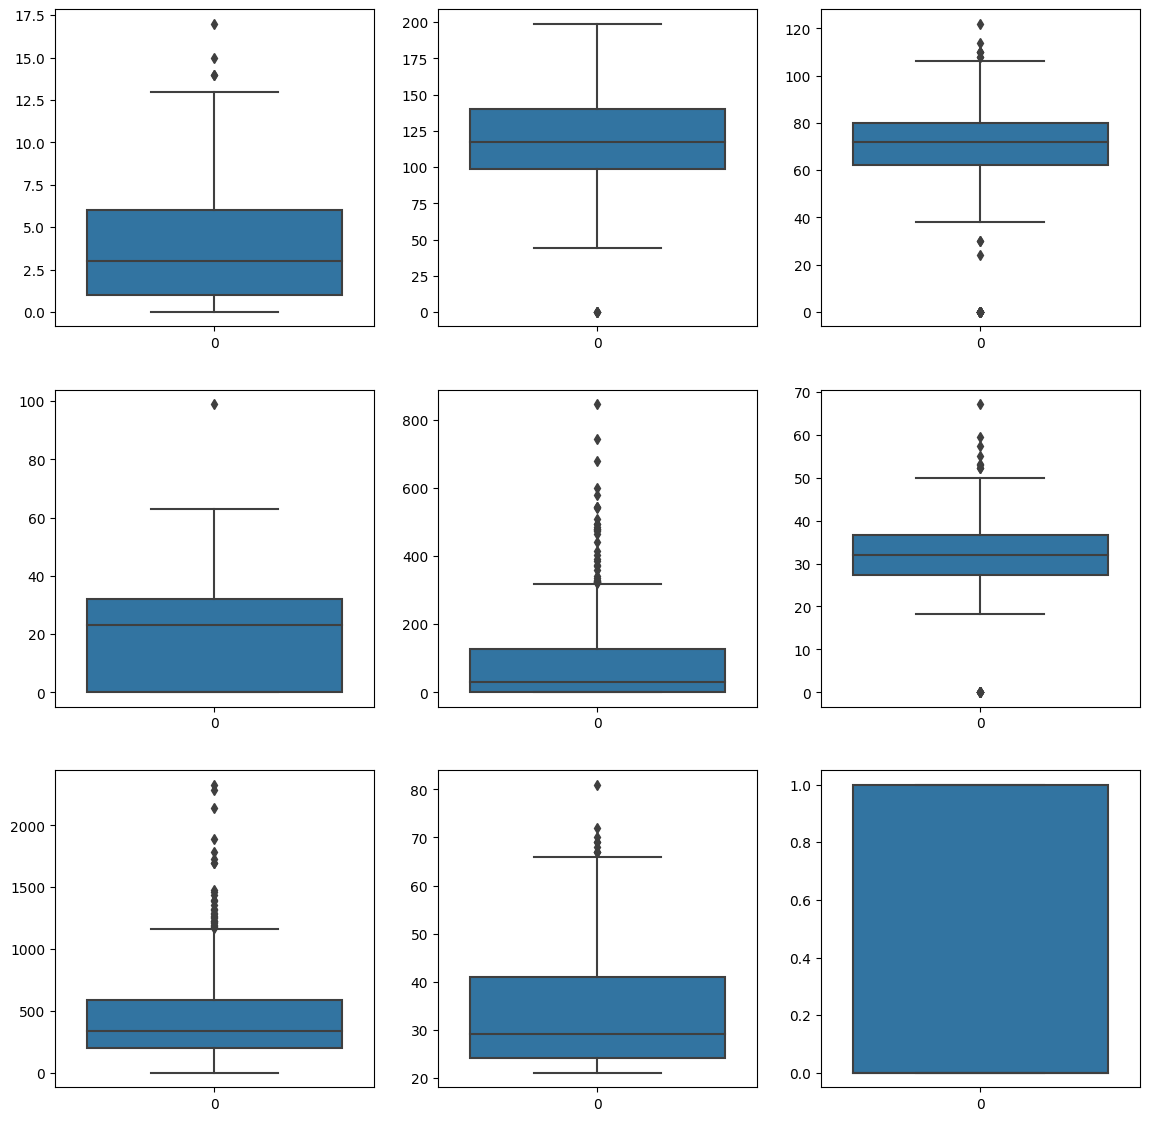

In [9]:
%matplotlib inline
# Univariate Histograms
f, axes = plt.subplots(3, 3, figsize = (14,14))
sns.boxplot(data["preg"], ax = axes[0,0])
sns.boxplot(data["plas"], ax = axes[0,1])
sns.boxplot(data["pres"], ax = axes[0,2])
sns.boxplot(data["skin"], ax = axes[1,0])
sns.boxplot(data["test"], ax = axes[1,1])
sns.boxplot(data["mass"], ax = axes[1,2])
sns.boxplot(data["pedi"], ax = axes[2,0])
sns.boxplot(data["age"], ax = axes[2,1])
sns.boxplot(data["class"], ax = axes[2,2])

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización Multivariable</font>

Los gráficos multivariables son los gráficos en los que podemos analizar la relación o interacciones entre atributos. El objetivo es aprender algo acerca de la distribución, la tendencia y la distribución en grupos de datos, generalmente pares de atributos.

<a id="section31"></a>
## <font color="#004D7F">3.1. Matriz de correlación </font>

Podemos ver que la matriz es simétrica, es decir, la parte inferior izquierda de la matriz es la misma que la parte superior derecha. Esto es útil ya que podemos ver dos vistas diferentes en los mismos datos en una parcela. También podemos ver que cada variable está perfectamente correlacionada positivamente entre sí (como era de esperar) en la línea diagonal desde la parte superior izquierda a la parte inferior derecha.

<function matplotlib.pyplot.show(close=None, block=None)>

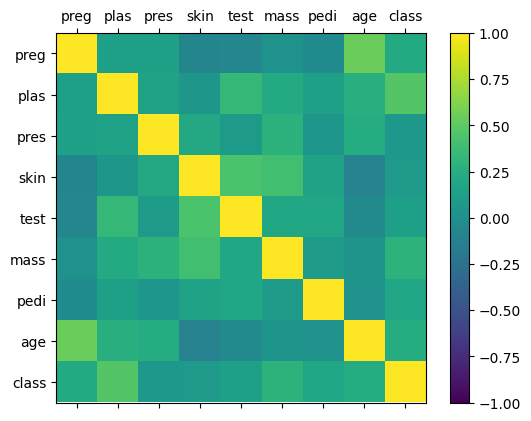

In [15]:
import numpy as np
%matplotlib inline
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin =-1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show

Al igual que hemos visto antes podemos ver también el gráfico con la librería Seaborn

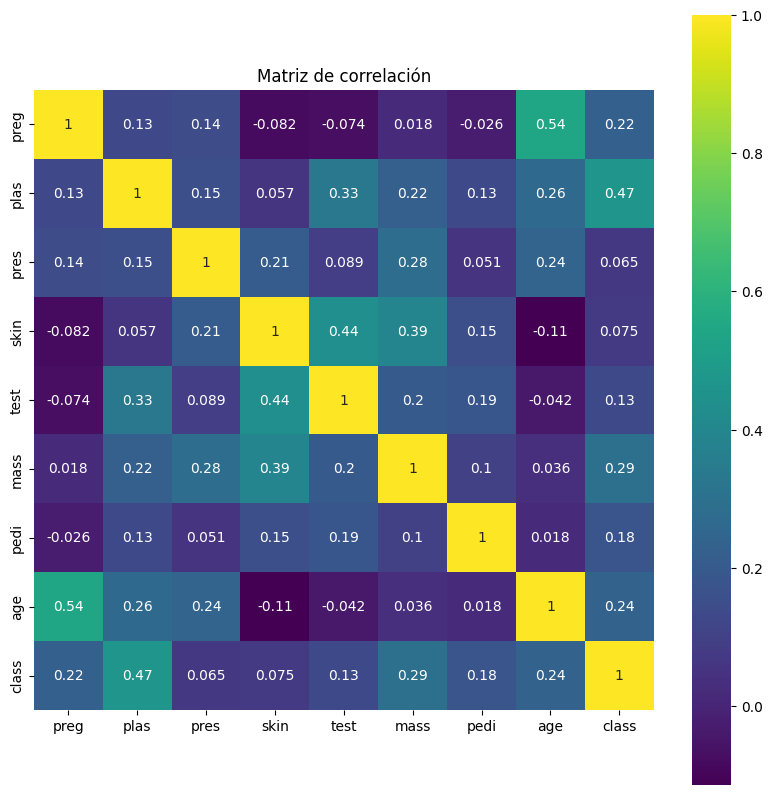

In [16]:
correlation = data.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Matriz de correlación')
plt.show()

<a id="section32"></a>
## <font color="#004D7F">3.2. Matriz de dispersión </font>

Al igual que el diagrama de matriz de correlación anterior, la matriz de diagrama de dispersión es simétrica. Esto es útil para mirar las relaciones por pares desde diferentes perspectivas. Debido a que no tiene mucho sentido dibujar un diagrama de dispersión de cada variable consigo mismo, la diagonal muestra histogramas de cada atributo.

In [17]:
!pip install pandas.tools

ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


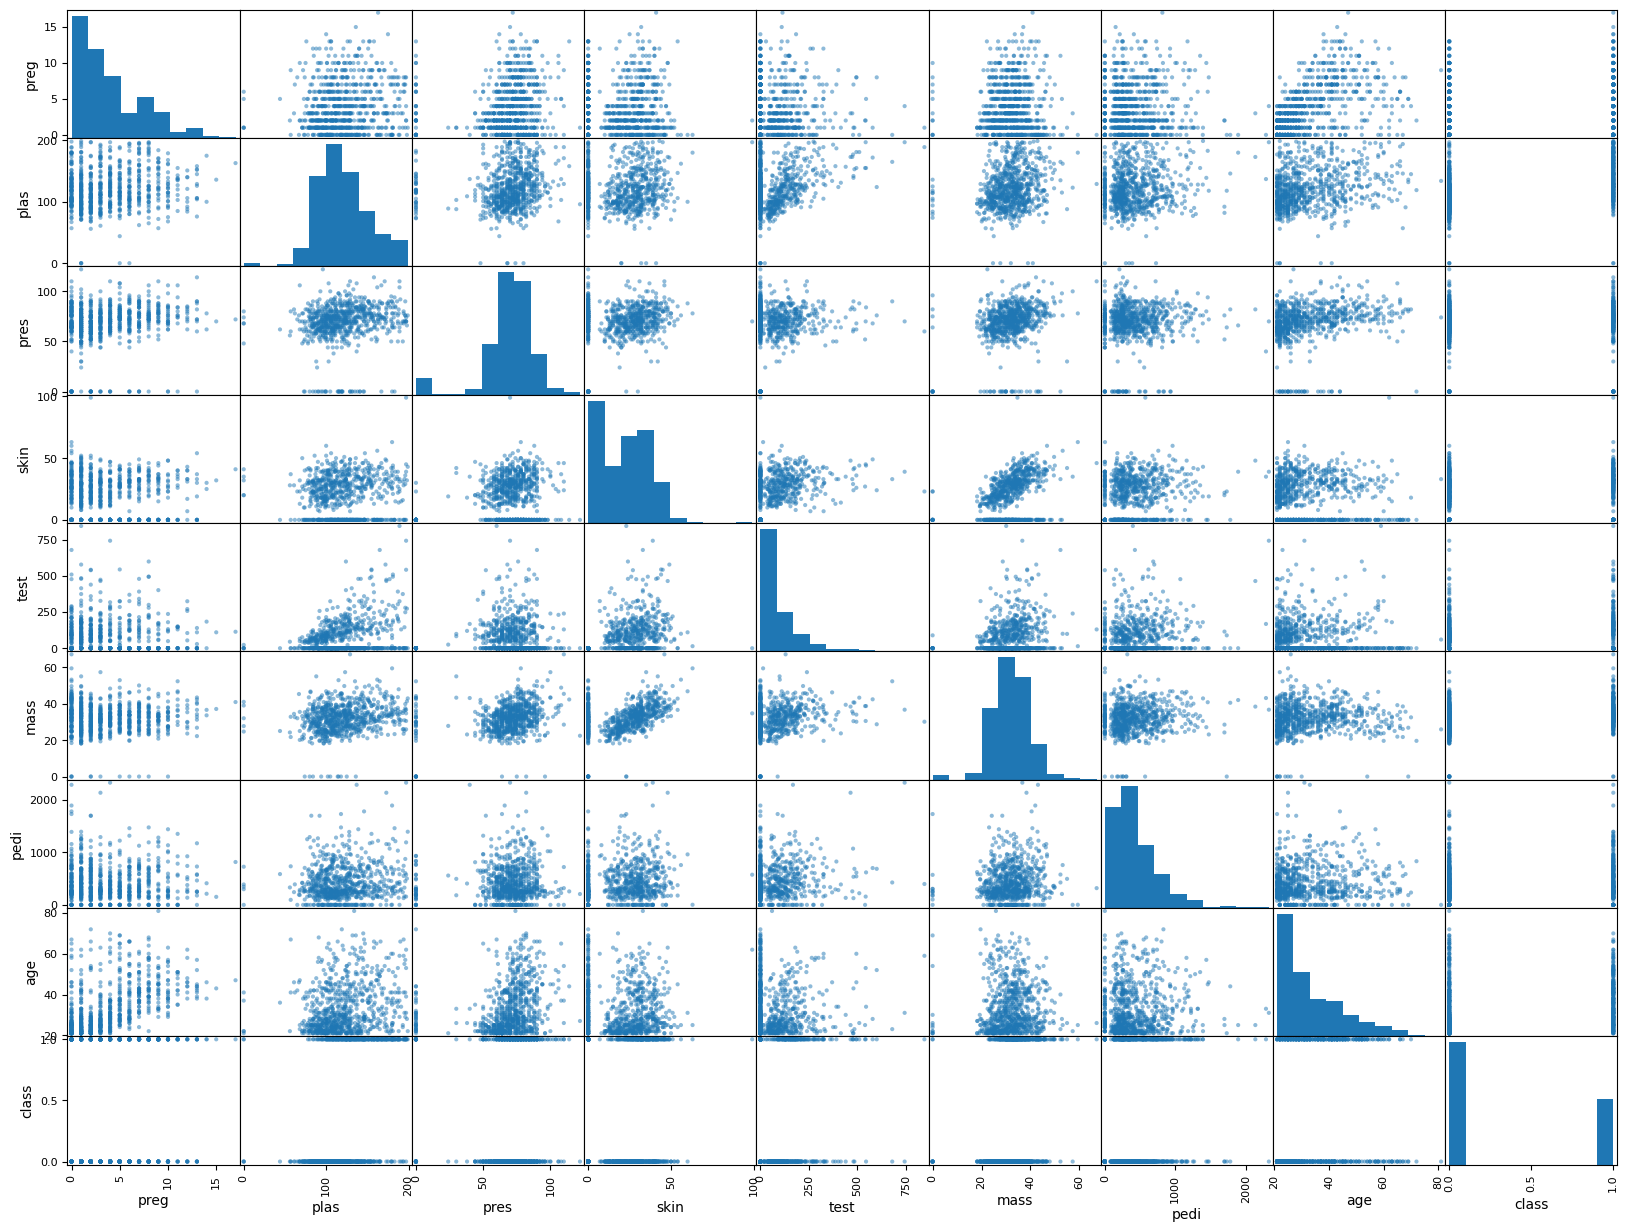

In [18]:
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"] = [20,15]
scatter_matrix(data)
plt.show()

Al igual que hemos visto antes podemos ver también el gráfico con la librería Seaborn.

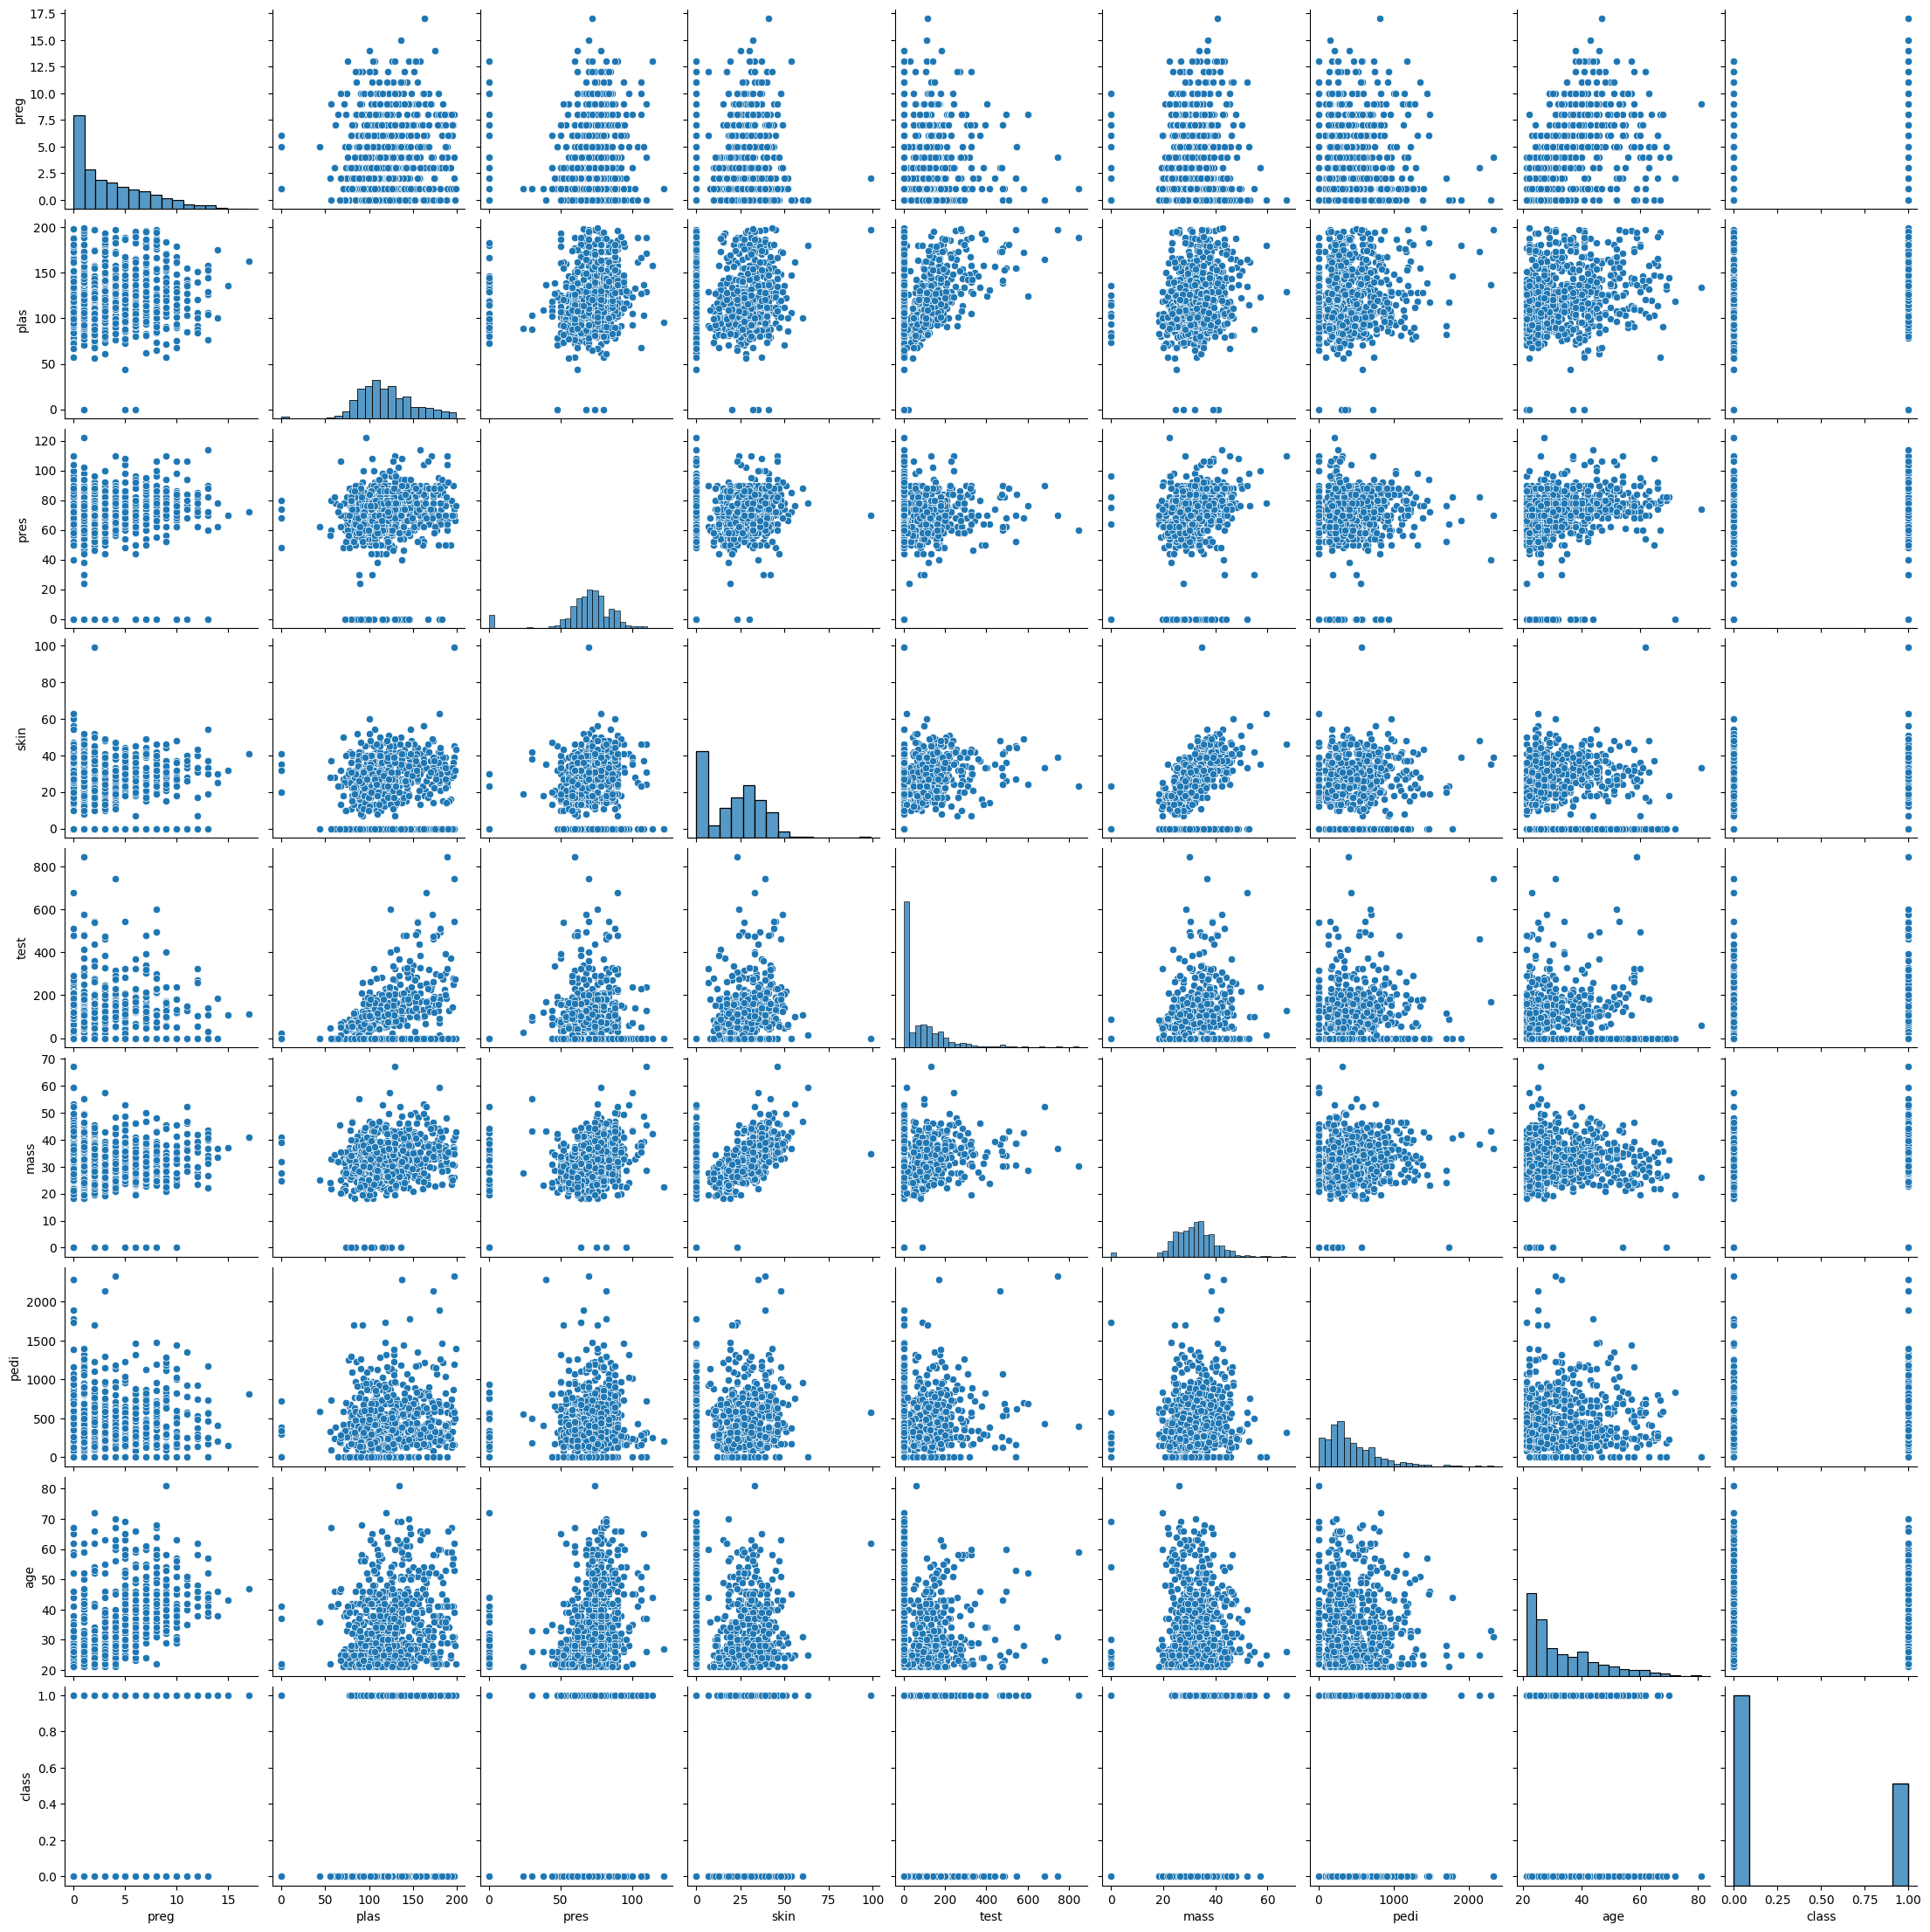

In [19]:
sns.pairplot(data)

<a id="section33"></a>
## <font color="#004D7F">3.3.  Matriz de dispersion por clase </font>

Los puntos en una matriz de diagrama de dispersión pueden ser coloreados por la etiqueta de clase en problemas de clasificación. Esto puede ayudarnos a detectar una separación clara (o no clara) de las clases y quizás a darnos una idea de lo difícil que puede ser el problema.

Al igual que el anterior gráfico los diagramas están dados por la interacción de los pares de atributos pero, en este caso, teniendo en cuenta la etiqueta clase.

In [20]:
%matplotlib inline

sns.pairplot(data, hue="class", diag_kind="hist")

Output hidden; open in https://colab.research.google.com to view.

<a id="section34"></a>
## <font color="#004D7F">3.4. Boxplots por clase </font>

Este tipo de gráficos nos ayudan a comprender la superposición y la separación de la clase con los atributos características, por ejemplo en el gráfico podemos observar una buena separación de la clase _Setosa_ para el atributo _Petal.lenght_

<ipython-input-26-04bab343ab72>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
<ipython-input-26-04bab343ab72>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(422)
<ipython-input-26-04bab343ab72>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(423)
<ipython-input-26-04bab343ab72>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(424)


<Figure size 2000x1500 with 0 Axes>

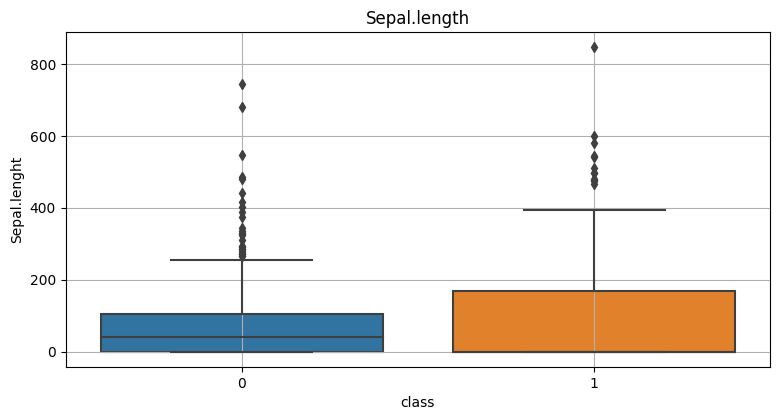

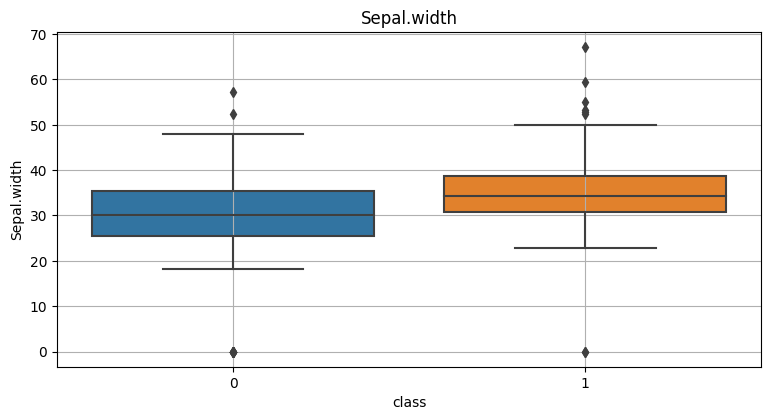

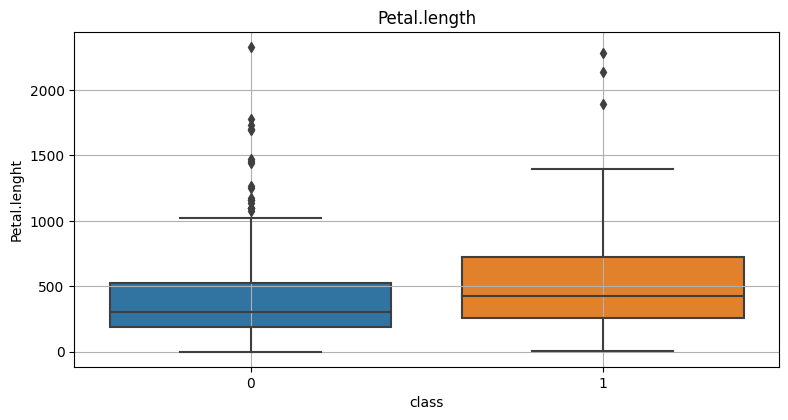

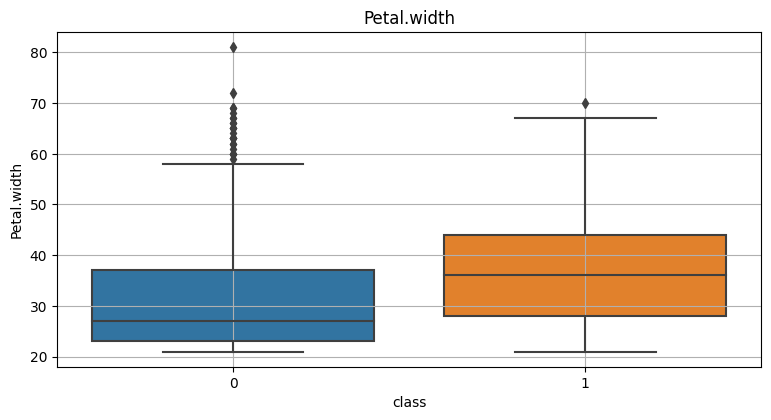

In [26]:
%matplotlib inline
filenames ='./iris.data.csv'
names = ['Sepal.lenght','Sepal.width', 'Petal.lenght', 'Petal.width','class']
data = pd.read_csv(filename, names = names)
plt.figure(1)

plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.boxplot(x ='class', y = 'Sepal.lenght', data = data)
plt.title('Sepal.length')
plt.grid(True)

plt.subplots(figsize=(20,20))
plt.subplot(422)
sns.boxplot(x ='class', y = 'Sepal.width', data = data)
plt.title('Sepal.width')
plt.grid(True)

plt.subplots(figsize=(20,20))
plt.subplot(423)
sns.boxplot(x ='class', y = 'Petal.lenght', data = data)
plt.title('Petal.length')
plt.grid(True)

plt.subplots(figsize=(20,20))
plt.subplot(424)
sns.boxplot(x ='class', y = 'Petal.width', data = data)
plt.title('Petal.width')
plt.grid(True)

plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>